# In this project we try to predict whether a given CT Scan/MRI Scan image has brain tumour or not.

# This project provides a clear picture of improved accuracy by using Transfer Learning method over traditional Deep Learning technique (CNN).

# Loading Dataset

In [ ]:
!wget https://www.dropbox.com/s/9l5vr0g78n10scq/BrainTumorDataSet.zip?dl=0

--2022-05-15 18:39:58--  https://www.dropbox.com/s/9l5vr0g78n10scq/BrainTumorDataSet.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9l5vr0g78n10scq/BrainTumorDataSet.zip [following]
--2022-05-15 18:39:58--  https://www.dropbox.com/s/raw/9l5vr0g78n10scq/BrainTumorDataSet.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9c299f66ca9226691949e92738.dl.dropboxusercontent.com/cd/0/inline/BlW6E7mpmBOQWMpMdth9-ybzdgJVGKziXxEekIP_ZYMtkafGbNEbF2g6JQGe_RxYUgVl2pX6tnVQUR0x8jbNNPgG5q7eHivm7gSqBgEvf0vuxkSVF68mmY-EVyJWO-AacVwvkWsQ-q18MBQx4grsL7qM4whXBlonFYD71YJbt4uEVg/file# [following]
--2022-05-15 18:39:58--  https://uc9c299f66ca9226691949e92738.dl.dropboxusercontent.com/cd/0/inline/BlW6E7mpmBOQWMpMdth9-ybzdgJVGKziX

In [ ]:
!unzip /content/BrainTumorDataSet.zip?dl=0

Archive:  /content/BrainTumorDataSet.zip?dl=0
   creating: Brain Tumor Data Set/Brain Tumor/
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1005).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1006).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1007).jpg

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os                             #file directories eg. deletion
import math                           #math computations
import shutil                         #move files from one folder to another
import glob

In [ ]:
root = '/content/Brain Tumor Data Set'
total_images = {}

for dir in os.listdir(root):
  total_images[dir] = len(os.listdir(os.path.join(root,dir)))

total_images.items()


dict_items([('Healthy', 2087), ('Brain Tumor', 2513)])

# Split data:
 70% train,
 15% valid,
 15% test.

In [ ]:
def folders(p, split):

  if not os.path.exists("./"+p):         ##creating train folder
    os.mkdir("./"+p)

    for dir in os.listdir(root):
      os.makedirs("./"+p+'/'+dir)
      for img in np.random.choice(a = os.listdir(os.path.join(root,dir)), size = (math.floor (split*total_images[dir])-5), replace = False):
        origin = os.path.join(root,dir,img)
        dest = os.path.join("./"+p, dir)
        shutil.copy(origin,dest)
        os.remove(origin)
  else:
    print(f"{p}Folder Exists")


In [ ]:
folders('train',0.70)

In [ ]:
folders('test',0.15)

In [ ]:
folders('valid', 0.15)

# Building the CNN Model

In [ ]:
import keras
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import cv2
 
# read image
img = cv2.imread('/content/Brain Tumor Data Set/Brain Tumor/Cancer (1169).JPG', cv2.IMREAD_UNCHANGED)
 
# get dimensions of image
dimensions = img.shape
print(dimensions)

AttributeError: ignored

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size=(3,3), activation = 'relu', input_shape =(256, 256, 3)))

model.add(Conv2D(filters = 36, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))   

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2))) 

model.add(Conv2D(filters = 128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2))) 

model.add(Dropout(rate = 0.25))

model.add(Flatten()) ##Feature extraction is done by the above code and more feature extraction will lead to overfitting, so we flatten it
model.add(Dense(units = 64, activation= 'relu'))
model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 128)       7

In [ ]:
model.compile(optimizer='adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

Preparing Data for Data Generator

In [ ]:
def preprocessingImages(path):
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip = True) ##data Augmentation
  image = image_data.flow_from_directory(directory = path, target_size= (256,256), batch_size = 32, class_mode = 'binary')

  return image


In [ ]:
path = '/content/train'

train_data = preprocessingImages(path)

Found 3209 images belonging to 2 classes.


In [ ]:
def preprocessingImages1(path):
  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory = path, target_size= (256,256), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = '/content/test'

test_data = preprocessingImages1(path)

Found 679 images belonging to 2 classes.


In [ ]:
path = '/content/valid'

valid_data = preprocessingImages1(path)

Found 679 images belonging to 2 classes.


In [ ]:
#early stoping

from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor = 'val_accuracy', min_delta= 0.01, patience = 5, verbose = 1, mode = 'auto')

model_check = ModelCheckpoint(monitor = 'val_accuracy', filepath = './bestmodel.h5', verbose = 1, save_best_only = True, mode = 'auto')

cb = [early_stop,model_check]
 

# Model Training

In [ ]:
model = model.fit_generator(generator = train_data, 
                              steps_per_epoch = 8, 
                              epochs = 30, verbose = 1, #verbose is to show the execution
                              validation_data=valid_data,
                              validation_steps=16, callbacks = cb) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.6783 - accuracy: 0.5923
Epoch 1: val_accuracy improved from -inf to 0.55859, saving model to ./bestmodel.h5
8/8 [==============================] - 21s 990ms/step - loss: 0.6783 - accuracy: 0.5923 - val_loss: 0.6776 - val_accuracy: 0.5586
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6825 - accuracy: 0.5625
Epoch 2: val_accuracy improved from 0.55859 to 0.58203, saving model to ./bestmodel.h5
8/8 [==============================] - 8s 1s/step - loss: 0.6825 - accuracy: 0.5625 - val_loss: 0.6725 - val_accuracy: 0.5820
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6669 - accuracy: 0.5977
Epoch 3: val_accuracy improved from 0.58203 to 0.68359, saving model to ./bestmodel.h5
8/8 [==============================] - 8s 1s/step - loss: 0.6669 - accuracy: 0.5977 - val_loss: 0.6306 - val_accuracy: 0.6836
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6568 - accuracy:

In [ ]:
hs = model.history
hs.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Graphical Interpretation of model

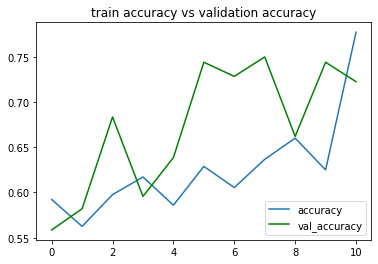

In [ ]:
plt.plot(hs['accuracy'])
plt.plot(hs['val_accuracy'], c = 'green')
plt.legend(["accuracy", "val_accuracy"], loc ="lower right")
plt.title('train accuracy vs validation accuracy')
plt.show()

Validation accuracy is performing good

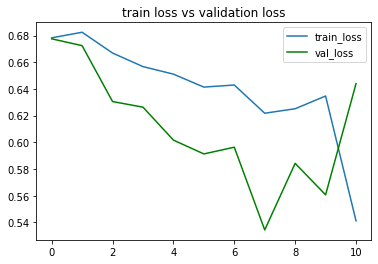

In [ ]:
plt.plot(hs['loss'])
plt.plot(hs['val_loss'], c = 'green')
plt.legend(["train_loss", "val_loss"], loc ="upper right")
plt.title('train loss vs validation loss')
plt.show()

# Model Accuracy

In [ ]:
from keras.models import load_model

final_model = load_model('/content/bestmodel.h5')


In [ ]:
acc = final_model.evaluate_generator(test_data)[1]

print(f'Model Accuracy = {acc}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Model Accuracy = 0.7172312140464783


# Check model prediction

In [ ]:
from keras.preprocessing.image import load_img, img_to_array


In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

(1, 256, 256, 3)
(1, 256, 256, 3)
0.26739463
Tumour Present


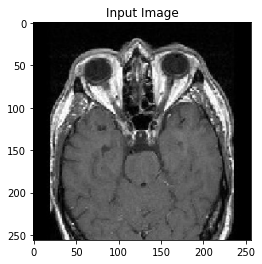

In [ ]:
path = "/content/train/Healthy/Not Cancer  (1).jpg"

img = load_img(path, target_size = (256,256) )
input_arr = img_to_array(img)/255
input_arr = np.array([input_arr])
print(input_arr.shape)

# input_arr = np.expand_dims(input_arr, axis = 0)
print(input_arr.shape)

pred= final_model.predict(input_arr)[0][0] 
print(pred)
pred =np.argmax(pred)

pred

if pred <= 0.50:
  print('Tumour Present')
else:
  print ('Tumour Absent')

plt.imshow(input_arr[0])
plt.title('Input Image')
plt.show()

# Model Training Using *MobileNet Architecture*

In [ ]:
from keras.models import Model, load_model
from keras.applications.mobilenet import  MobileNet, preprocess_input

In [ ]:
##data Augmentation reamins same but we are not rescaling the image

def preprocessingImages3(path):
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, preprocessing_function = preprocess_input, horizontal_flip = True) 
  image = image_data.flow_from_directory(directory = path, target_size= (256,256), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = '/content/train'

train_data = preprocessingImages(path)

Found 3209 images belonging to 2 classes.


In [ ]:
def preprocessingImages4(path):
  image_data = ImageDataGenerator(preprocessing_function = preprocess_input)
  image = image_data.flow_from_directory(directory = path, target_size= (256,256), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = '/content/test'

test_data = preprocessingImages1(path)

Found 679 images belonging to 2 classes.


In [ ]:
path = '/content/valid'

valid_data = preprocessingImages1(path)

Found 679 images belonging to 2 classes.


In [ ]:
tl_model = MobileNet(input_shape = (256, 256, 3), include_top = False)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
for layer in tl_model.layers:
  layer.trainable = False

In [ ]:
tl_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 128, 128, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 128, 128, 32)     128       
 ation)                                         

In [ ]:
x = Flatten()(tl_model.output)
x = Dense(units = 1, activation = 'sigmoid') (x)

model = Model(tl_model.input, x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 128, 128, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 128, 128, 32)     128       
 ation)                                                      

dense and flatten layer are added at the bottom

In [ ]:
model.compile(optimizer = 'rmsprop', loss = keras.losses.binary_crossentropy, metrics =['accuracy'])

Train our model

In [ ]:
model_check = ModelCheckpoint(filepath = 'bestmodel2.h5', monitor = 'val_accuracy', verbose = 1, save_best_only = True)

early_stop = EarlyStopping(monitor = 'val_accuracy', min_delta= 0.01, patience = 3, verbose = 1)

cb = [model_check, early_stop]


In [ ]:
mobilenet = model.fit_generator(generator = train_data, 
                              steps_per_epoch = 8, 
                              epochs = 30, verbose = 1, #verbose is to show the execution
                              validation_data=valid_data,
                              validation_steps=16, callbacks = cb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 8.6879 - accuracy: 0.6211
Epoch 1: val_accuracy improved from -inf to 0.76172, saving model to bestmodel2.h5
8/8 [==============================] - 10s 985ms/step - loss: 8.6879 - accuracy: 0.6211 - val_loss: 2.1510 - val_accuracy: 0.7617
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 3.6638 - accuracy: 0.7296
Epoch 2: val_accuracy improved from 0.76172 to 0.77734, saving model to bestmodel2.h5
8/8 [==============================] - 7s 930ms/step - loss: 3.6638 - accuracy: 0.7296 - val_loss: 1.8817 - val_accuracy: 0.7773
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 1.4387 - accuracy: 0.8516
Epoch 3: val_accuracy did not improve from 0.77734
8/8 [==============================] - 7s 916ms/step - loss: 1.4387 - accuracy: 0.8516 - val_loss: 3.2019 - val_accuracy: 0.6758
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2.7190 - accuracy: 0.7695
Epoch 4: val_accuracy im

In [ ]:
bestmodel = load_model('/content/bestmodel2.h5')

## check accuracy

In [ ]:
accuracy = bestmodel.evaluate_generator(test_data)[1]

print(f"Model Accuracy = {accuracy*100}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Model Accuracy = 92.48895645141602


In [ ]:
hs = mobilenet.history
hs.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

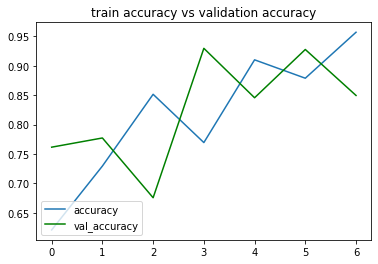

In [ ]:
plt.plot(hs['accuracy'])
plt.plot(hs['val_accuracy'], c = 'green')
plt.legend(["accuracy", "val_accuracy"], loc ="lower left")
plt.title('train accuracy vs validation accuracy')
plt.show()

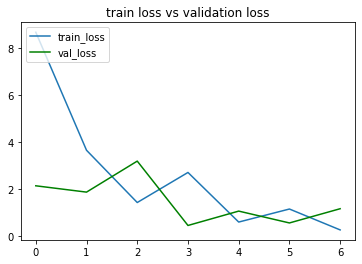

In [ ]:
plt.plot(hs['loss'])
plt.plot(hs['val_loss'], c = 'green')
plt.legend(["train_loss", "val_loss"], loc ="upper left")
plt.title('train loss vs validation loss')
plt.show()

In [ ]:
from keras.preprocessing.image import load_img, img_to_array


##mobile net model bestmodel

(1, 256, 256, 3)
(1, 256, 256, 3)
0.07262955
Tumour Present


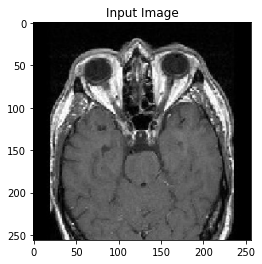

In [ ]:
path = "/content/train/Healthy/Not Cancer  (1).jpg"

img = load_img(path, target_size = (256,256) )
input_arr = img_to_array(img)/255
input_arr = np.array([input_arr])
print(input_arr.shape)

# input_arr = np.expand_dims(input_arr, axis = 0)
print(input_arr.shape)

pred= bestmodel.predict(input_arr)[0][0] 
print(pred)
pred =np.argmax(pred)

pred

if pred < 0.50:
  print('Tumour Present')
else:
  print('Tumour Absent')

plt.imshow(input_arr[0])
plt.title('Input Image')
plt.show()